## ResNet50 from Keras

First we need to import used libraries:

In [1]:
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from keras.utils import plot_model
from helper.prepare_data import prepare_data

First, we pick the dataset that we would like to use from:
<br>1 - Age, gender, ethnicity CSV
<br>2 - UTKFace
<br>3 - Fairface

In [2]:
choice = 2
colour = True

Prepare data from each dataset so that we end up with normalized pixels and labels:

In [3]:
x, y_age, y_gender, y_ethnicity, img_size = prepare_data(choice = choice, colour = colour)

Display some exemplary images:

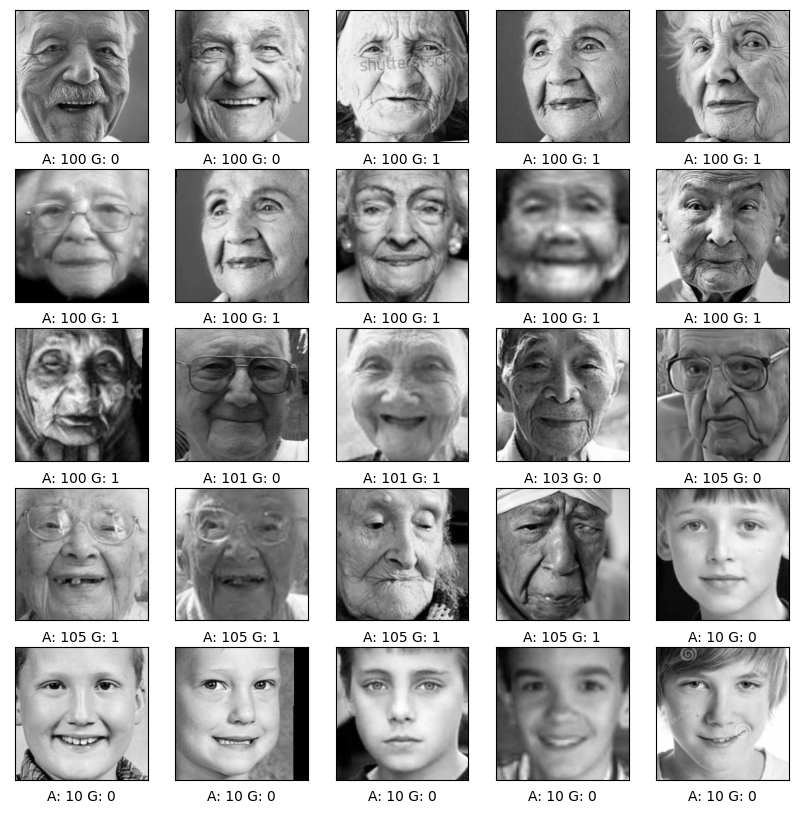

In [4]:
# size of the whole grid of images
plt.figure(figsize=(10, 10))

# display first 25 images in a 5x5 grid
for i in range(0, 25):
    plt.subplot(5, 5, (i % 25) + 1)
    plt.grid(False)
    #disable x and y axis description
    plt.xticks([])
    plt.yticks([])
    if colour:
        plt.imshow(x[i].reshape(img_size, img_size, 3), cmap='gray')
    else:
        plt.imshow(x[i].reshape(img_size, img_size), cmap='gray')
    # A = age, G = gender, E = ethnicity
    plt.xlabel("A: "+ str(y_age[i]) + " G: " + str(y_gender[i]) + (" E: " + str(y_ethnicity[i]) if y_ethnicity.size > 0 else ""))
plt.show()

MobileNet implementation:

In [6]:
base_model = tf.keras.applications.ResNet50(input_shape = (img_size, img_size, 3), include_top = False, weights = 'imagenet')
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
gender_prediction_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')
age_prediction_layer = tf.keras.layers.Dense(1, activation = 'relu')

model_gender = tf.keras.Sequential([
  base_model,
  global_average_layer,
  gender_prediction_layer
])

model_gender.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'mae'])
model_gender.summary()

ValueError: The input must have 3 channels; Received `input_shape=(200, 200, 1)`

In [ ]:
model_age = tf.keras.Sequential([
  base_model,
  global_average_layer,
  age_prediction_layer
])

model_age.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss = 'mse', metrics = ['accuracy', 'mae'])
model_age.summary()

In [ ]:
plot_model(model_age, to_file = os.getcwd() + '//images//models//resnet50_model.png', show_shapes = True, show_dtype = False, show_layer_names = False, rankdir = 'TB', expand_nested = False, dpi = 96)

In [ ]:
history_age = model_age.fit(x, y_age, epochs = 20, validation_split = 0.2)

In [ ]:
age_acc = history_age.history['mae']
age_val_acc = history_age.history['val_mae']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Mean Absolute Error')
plt.plot(epochs, age_val_acc, 'r', label='Validation Mean Absolute Error')
plt.title('Age Mean Absolute Error Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//resnet50_age_mae_ds_' + str(choice), bbox_inches='tight')
plt.figure()

In [ ]:
age_acc = history_age.history['accuracy']
age_val_acc = history_age.history['val_accuracy']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_acc, 'r', label='Validation Accuracy')
plt.title('Age Accuracy Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//resnet50_age_accuracy_ds_' + str(choice))
plt.figure()

In [ ]:
history_gender = model_age.fit(x, y_gender, epochs = 20, validation_split = 0.2)

In [ ]:
gender_acc = history_gender.history['mae']
gender_val_acc = history_gender.history['val_mae']
epochs = range(len(gender_acc))

plt.plot(epochs, gender_acc, 'b', label='Training Mean Absolute Error')
plt.plot(epochs, gender_val_acc, 'r', label='Validation Mean Absolute Error')
plt.title('Gender Mean Absolute Error Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//resnet50_gender_mae_ds_' + str(choice), bbox_inches='tight')
plt.figure()

In [ ]:
gender_acc = history_gender.history['accuracy']
gender_val_acc = history_gender.history['val_accuracy']
epochs = range(len(gender_acc))

plt.plot(epochs, gender_acc, 'b', label='Training Accuracy')
plt.plot(epochs, gender_val_acc, 'r', label='Validation Accuracy')
plt.title('Gender Accuracy Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//resnet50_gender_accuracy_ds_' + str(choice))
plt.figure()